In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import keras
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

/home/nachofranco14/Documents/facultad/machine_learning/ds/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
df = pd.read_csv('../df.csv')

X = df.drop(columns=['Unnamed: 0','tag'], axis=1)
y = df['tag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40, shuffle=True)

In [5]:
X_train.head()
X_test.head()

runtimeMinutes  actor_minAccumulatedRating  actor_maxAccumulatedRating  \
20849        0.438095                    0.663300                    0.724747   
7581         0.385714                    0.545455                    0.630592   
36723        0.414286                    0.813131                    0.818182   
13957        0.585714                    0.601010                    0.634867   
21593        0.485714                    0.608586                    0.707071   

       actor_meanAccumulatedRating  actor_varAccumulatedRating  \
20849                     0.694024                    0.000944   
7581                      0.588023                    0.001812   
36723                     0.815657                    0.000006   
13957                     0.621599                    0.000218   
21593                     0.669321                    0.001881   

       actress_minAccumulatedRating  actress_maxAccumulatedRating  \
20849                      0.663300                      0.676768   
7581                       0.555556                      0.672588   
36723                      0.777778                      0.818182   
13957                      0.674964                      0.674964   
21593                      0.560045                      0.560045   

       actress_meanAccumulatedRating  actress_varAccumulatedRating  \
20849                       0.670034                      0.000045   
7581                        0.614072                      0.003424   
36723                       0.797980                      0.000408   
13957                       0.674964                      0.000000   
21593                       0.560045                      0.000000   

       director_minAccumulatedRating    ...      g_Musical  g_Mystery  g_News  \
20849                       0.686869    ...              0          0       0   
7581                        0.545455    ...              0          0       0   
36723                       0.748485    ...              0          0       0   
13957                       0.956158    ...              0          0       0   
21593                       0.732323    ...              0          0       0   

       g_Romance  g_Sci-Fi  g_Sport  g_Talk-Show  g_Thriller  g_War  g_Western  
20849          1         0        0            0           0      0          0  
7581           0         0        0            0           0      0          0  
36723          1         0        0            0           0      0          0  
13957          0         0        0            0           0      0          0  
21593          1         0        0            0           0      0          0  

[5 rows x 46 columns]

runtimeMinutes  actor_minAccumulatedRating  actor_maxAccumulatedRating  \
740          0.371429                    0.313131                    0.439394   
25914        0.476190                    0.694121                    0.717172   
29777        0.295238                    0.737374                    0.737374   
597          0.428571                    0.292929                    0.292929   
26237        0.461905                    0.636364                    0.666667   

       actor_meanAccumulatedRating  actor_varAccumulatedRating  \
740                       0.376263                    0.003986   
25914                     0.704297                    0.000092   
29777                     0.737374                    0.000000   
597                       0.292929                    0.000000   
26237                     0.651515                    0.000230   

       actress_minAccumulatedRating  actress_maxAccumulatedRating  \
740                        0.313131                      0.313131   
25914                      0.700758                      0.700758   
29777                      0.737374                      0.737374   
597                        0.292929                      0.292929   
26237                      0.666667                      0.687879   

       actress_meanAccumulatedRating  actress_varAccumulatedRating  \
740                         0.313131                      0.000000   
25914                       0.700758                      0.000000   
29777                       0.737374                      0.000000   
597                         0.292929                      0.000000   
26237                       0.677273                      0.000112   

       director_minAccumulatedRating    ...      g_Musical  g_Mystery  g_News  \
740                         0.313131    ...              0          1       0   
25914                       0.739453    ...              0          0       0   
29777                       0.956158    ...              0          0       0   
597                         0.292929    ...              0          0       0   
26237                       0.673160    ...              0          0       0   

       g_Romance  g_Sci-Fi  g_Sport  g_Talk-Show  g_Thriller  g_War  g_Western  
740            0         0        0            0           1      0          0  
25914          0         0        0            0           0      0          0  
29777          0         0        0            0           0      0          0  
597            1         0        1            0           0      0          0  
26237          0         0        0            0           0      0          0  

[5 rows x 46 columns]

In [39]:
import matplotlib
import matplotlib.pyplot as plt
import numpy
import itertools
from sklearn.metrics import confusion_matrix
import graphviz 
from sklearn import tree

models_metrics = []
def get_accuracy(pred, values, text='', is_train=True, model_name='unnamed'):
    accuracy, precision, recall, f1 = get_metrics(values, pred)
    text = "model = %s, accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f \n" % (model_name, accuracy, precision, recall, f1)
    if is_train: 
        print(10*'='+' TRAIN '+10*'=')
    else:
        print(10*'='+' TEST '+10*'=')  
        models_metrics.append(text)
    print(text)  
    print()

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, numpy.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = numpy.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    
    cm = confusion_matrix(y_test, y_predicted)
    fig = plt.figure(figsize=(10, 10))
    plot = plot_confusion_matrix(cm, classes=['0 star','1 star','2 stars','3 stars','4 stars','5 stars'], normalize=False, title='Confusion matrix')
    plt.show()
    print(cm)
    
    return accuracy, precision, recall, f1

def evaluate_model(model, X_train, y_train, X_test, y_test, fit=False, model_name='unnamed', is_tree=False):
    if fit:
        model = model.fit(X_train, y_train)
    
    y_train_predicted = model.predict(X_train)
    y_test_predicted = model.predict(X_test)
    
    accuracy, precision, recall, f1 = get_metrics(y_train, y_train_predicted)
    print("="*10 + " TRAIN " + "="*10)
    print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f \n" % (accuracy, precision, recall, f1))
    
    accuracy, precision, recall, f1 = get_metrics(y_test, y_test_predicted)
    text = "model = %s, accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f \n" % (model_name, accuracy, precision, recall, f1)
    models_metrics.append(text)
    print("="*10 + " TEST " + "="*10)
    print(text)    
    return y_train_predicted, y_test_predicted, model


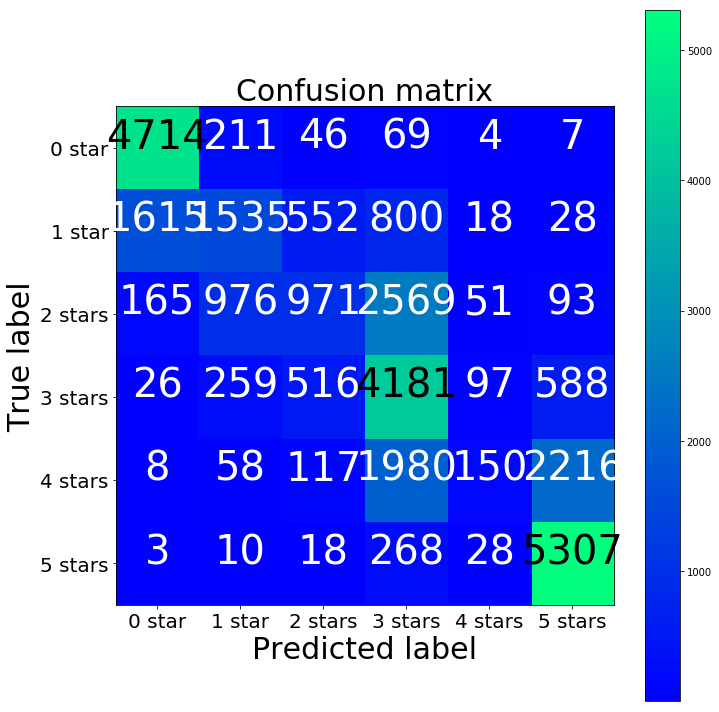

[[4714  211   46   69    4    7]
 [1615 1535  552  800   18   28]
 [ 165  976  971 2569   51   93]
 [  26  259  516 4181   97  588]
 [   8   58  117 1980  150 2216]
 [   3   10   18  268   28 5307]]
========== TRAIN ==========
accuracy = 0.557, precision = 0.530, recall = 0.557, f1 = 0.493 



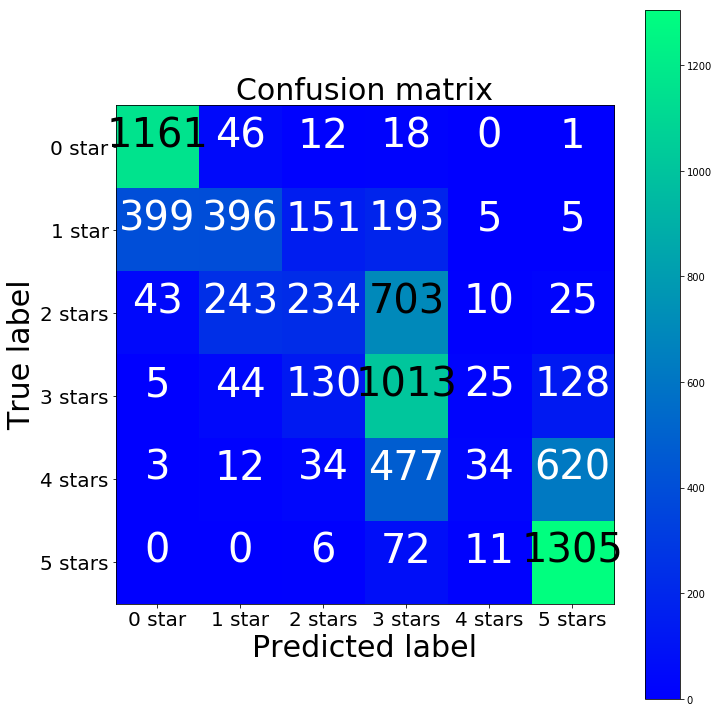

[[1161   46   12   18    0    1]
 [ 399  396  151  193    5    5]
 [  43  243  234  703   10   25]
 [   5   44  130 1013   25  128]
 [   3   12   34  477   34  620]
 [   0    0    6   72   11 1305]]
========== TEST ==========
model = LogisticRegression, accuracy = 0.548, precision = 0.518, recall = 0.548, f1 = 0.481 



(array([3, 0, 5, ..., 1, 5, 3]),
 array([0, 3, 5, ..., 5, 5, 3]),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False))

In [40]:
evaluate_model(model=LogisticRegression(),X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, fit=True, model_name='LogisticRegression')

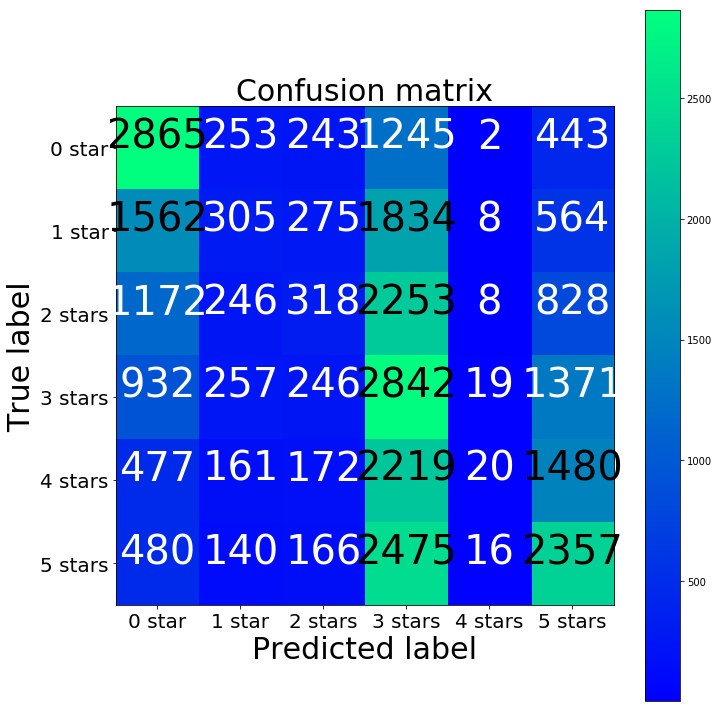

[[2865  253  243 1245    2  443]
 [1562  305  275 1834    8  564]
 [1172  246  318 2253    8  828]
 [ 932  257  246 2842   19 1371]
 [ 477  161  172 2219   20 1480]
 [ 480  140  166 2475   16 2357]]
========== TRAIN ==========
accuracy = 0.288, precision = 0.278, recall = 0.288, f1 = 0.236 



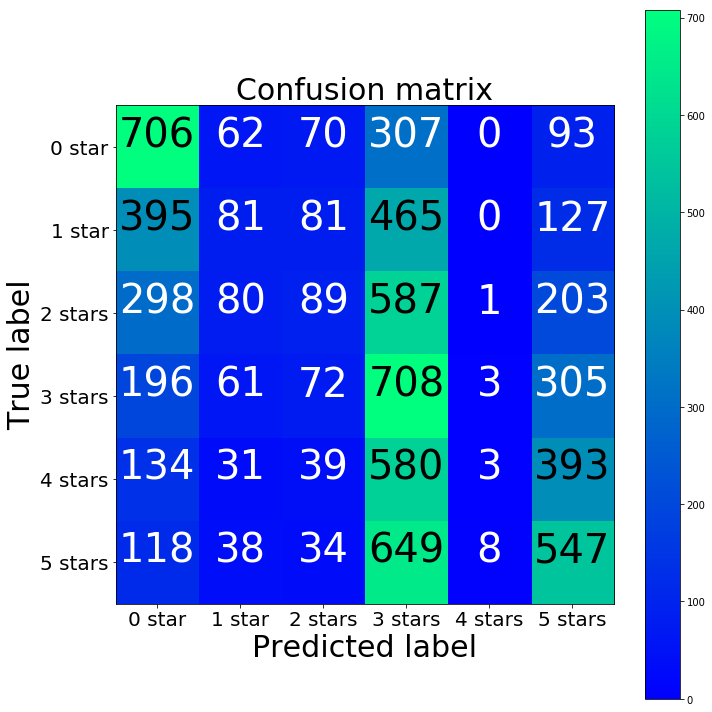

[[706  62  70 307   0  93]
 [395  81  81 465   0 127]
 [298  80  89 587   1 203]
 [196  61  72 708   3 305]
 [134  31  39 580   3 393]
 [118  38  34 649   8 547]]
========== TEST ==========
model = Naive Bayes, accuracy = 0.282, precision = 0.266, recall = 0.282, f1 = 0.230 



(array([3, 5, 1, ..., 0, 3, 3]),
 array([0, 3, 5, ..., 1, 3, 5]),
 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))

In [41]:
evaluate_model(model=MultinomialNB(),X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, fit=True, model_name='Naive Bayes')

/home/nachofranco14/Documents/facultad/machine_learning/ds/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


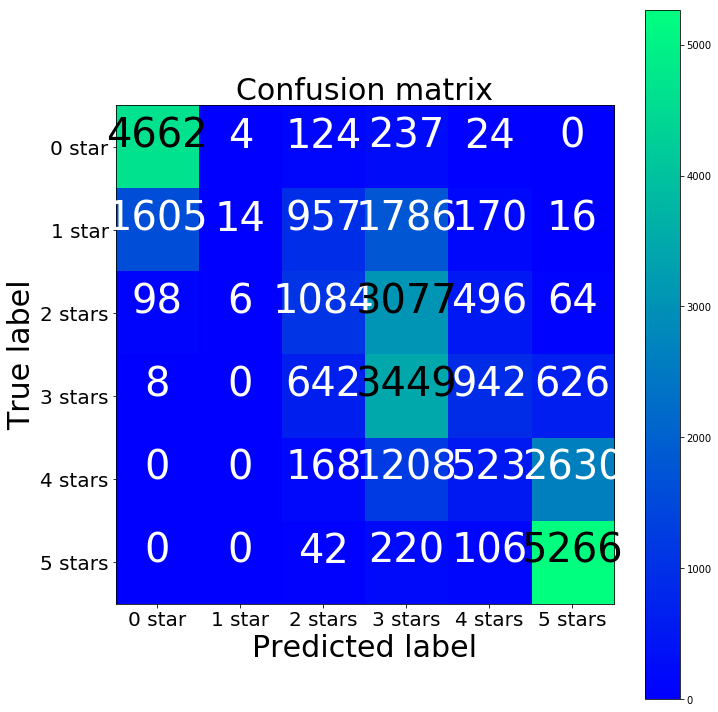

[[4662    4  124  237   24    0]
 [1605   14  957 1786  170   16]
 [  98    6 1084 3077  496   64]
 [   8    0  642 3449  942  626]
 [   0    0  168 1208  523 2630]
 [   0    0   42  220  106 5266]]
========== TRAIN ==========
accuracy = 0.496, precision = 0.481, recall = 0.496, f1 = 0.425 



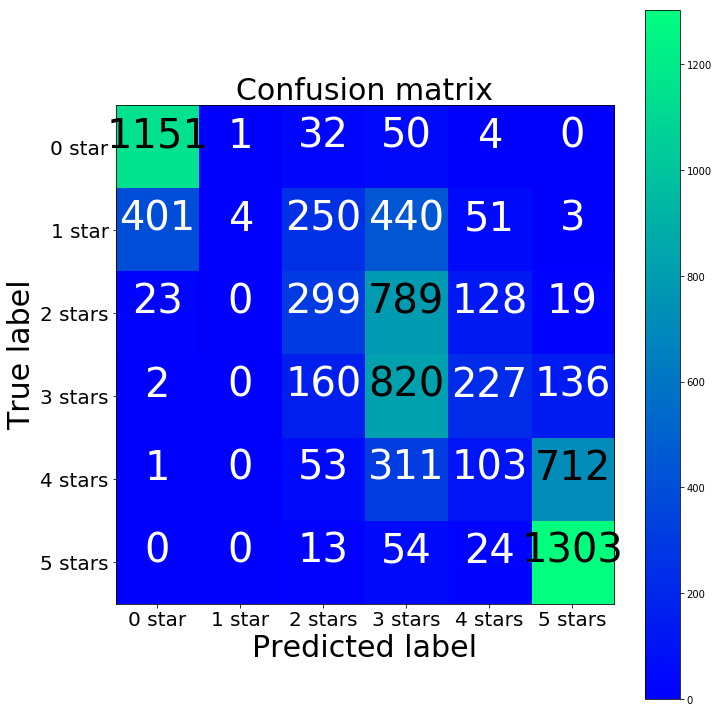

[[1151    1   32   50    4    0]
 [ 401    4  250  440   51    3]
 [  23    0  299  789  128   19]
 [   2    0  160  820  227  136]
 [   1    0   53  311  103  712]
 [   0    0   13   54   24 1303]]
========== TEST ==========
model = SVM, accuracy = 0.487, precision = 0.502, recall = 0.487, f1 = 0.413 



(array([4, 0, 5, ..., 2, 5, 4]),
 array([0, 5, 5, ..., 4, 5, 3]),
 SGDClassifier(alpha=0.001, average=False, class_weight=None, epsilon=0.1,
        eta0=0.0, fit_intercept=True, l1_ratio=0.15,
        learning_rate='optimal', loss='hinge', max_iter=None, n_iter=5,
        n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
        tol=None, verbose=0, warm_start=False))

In [42]:
svm = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=5, random_state=42)
evaluate_model(model=svm,X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, fit=True, model_name='SVM')

In [43]:
import graphviz 
from sklearn import tree

In [47]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

#rf = RandomForestClassifier(max_depth=20, n_estimators=32)
#rf = rf.fit(X=X_train, y=y_train)
#evaluate_model(model=rf,X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, fit=True, model_name='Random Forest')

dot_data = tree.export_graphviz(model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("tag")
dot_data = tree.export_graphviz(clf, out_file=None, \
                                feature_names=X_train.feature_names, \
                                class_names=y_train, \
                                filled=True, rounded=True, \
                                special_characters=True)  
graph = graphviz.Source(dot_data)  

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

(30254, 46)

In [57]:
clf = RandomForestClassifier(max_depth=20, n_estimators=32)
clf = clf.fit(X=X_train, y=y_train)
import pydotplus as pydot
import six
from sklearn import tree

i_tree = 0
for tree_in_forest in clf.estimators_:
    if (i_tree <1):        
        dot_data = six.StringIO() 
        tree.export_graphviz(tree_in_forest, out_file=dot_data,
                filled=True,
                rounded=True) 
        graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
        graph.write_pdf('dtree'+ str(i_tree) +'.png') 
        i_tree = i_tree + 1

InvocationException: GraphViz's executables not found

NameError: name 'model' is not defined

In [6]:
import pandas as pd
from sklearn.grid_search import GridSearchCV

class EstimatorSelectionHelper:
    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}
    
    def fit(self, X, y, cv=3, n_jobs=1, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs, 
                              verbose=verbose, scoring=scoring, refit=refit)
            gs.fit(X,y)
            self.grid_searches[key] = gs    
    
    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            for k,v in d.items():
                params[k] = v
            return pd.Series(dict(params))
                      
        rows = [row(k, gsc.cv_validation_scores, gsc.parameters) 
                     for k in self.keys
                     for gsc in self.grid_searches[k].grid_scores_]
        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)
        
        columns = ['estimator', 'min_score',  'max_score', 'mean_score','std_score']
        columns = columns + [c for c in df.columns if c not in columns]
        
        return df[columns]


/home/nachofranco14/Documents/facultad/machine_learning/ds/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/nachofranco14/Documents/facultad/machine_learning/ds/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import (ExtraTreesClassifier, RandomForestClassifier, 
                              AdaBoostClassifier, GradientBoostingClassifier)
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import (ExtraTreesClassifier, RandomForestClassifier, 
                              AdaBoostClassifier, GradientBoostingClassifier)
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


models = { 
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    #'AdaBoostClassifier': AdaBoostClassifier(),
    #'GradientBoostingClassifier': GradientBoostingClassifier(),
    #'SVC': SVC(),
    #'LogisticRegression': LogisticRegression(),
    #'MultinomialNB': MultinomialNB()
}

trees_depths = [7, 9, 11]

params = { 
    'ExtraTreesClassifier': { 'n_estimators': [32] , 'max_depth' : trees_depths },
    'RandomForestClassifier': { 'n_estimators': [32] , 'max_depth' : trees_depths },
    #'AdaBoostClassifier':  { 'n_estimators': [16, 32] },
    #'GradientBoostingClassifier': { 'n_estimators': [32, 50], 'learning_rate': [0.5, 0.6], 'max_depth': [3, 5] },
    #'SVC': [
        #{'kernel': ['linear'], 'C': [1, 10]},
        #{'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]},
    #],
    #'LogisticRegression': { },
    #'MultinomialNB': { }
}

helper = EstimatorSelectionHelper(models, params)
helper.fit(X_train, y_train, n_jobs=-1)
helper.score_summary(sort_by='min_score')

Running GridSearchCV for ExtraTreesClassifier.
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Running GridSearchCV for RandomForestClassifier.
Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    8.7s finished
/home/nachofranco14/Documents/facultad/machine_learning/ds/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/home/nachofranco14/Documents/facultad/machine_learning/ds/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


estimator min_score max_score mean_score   std_score  \
5  RandomForestClassifier  0.794348  0.802043   0.797416   0.0033295   
4  RandomForestClassifier   0.78485  0.791927   0.787632  0.00308097   
3  RandomForestClassifier  0.766111  0.776852   0.771237  0.00439847   
2    ExtraTreesClassifier  0.740432  0.747546   0.743241  0.00309102   
1    ExtraTreesClassifier  0.721611   0.72821    0.72592  0.00304932   
0    ExtraTreesClassifier  0.681904  0.689768   0.686355  0.00329355   

  max_depth n_estimators  
5        11           32  
4         9           32  
3         7           32  
2        11           32  
1         9           32  
0         7           32

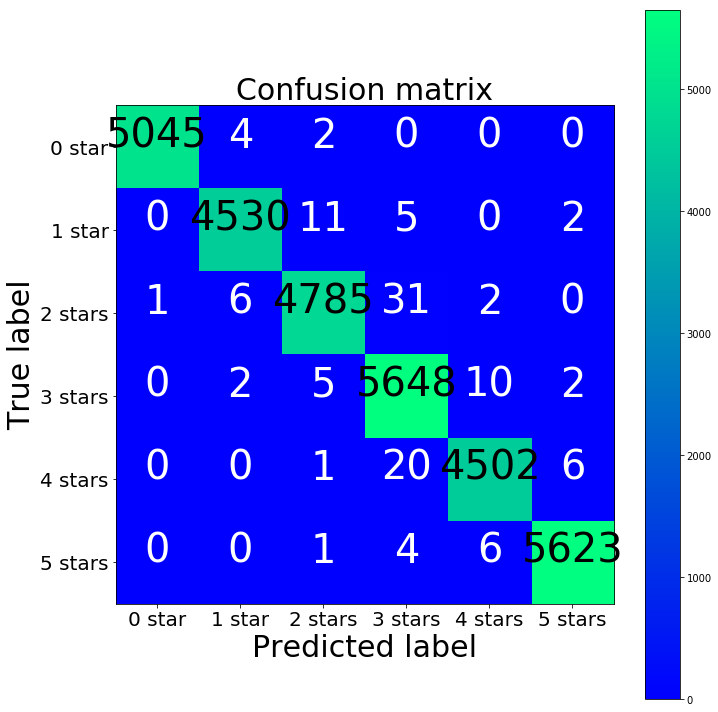

[[5045    4    2    0    0    0]
 [   0 4530   11    5    0    2]
 [   1    6 4785   31    2    0]
 [   0    2    5 5648   10    2]
 [   0    0    1   20 4502    6]
 [   0    0    1    4    6 5623]]
========== TRAIN ==========
accuracy = 0.996, precision = 0.996, recall = 0.996, f1 = 0.996 



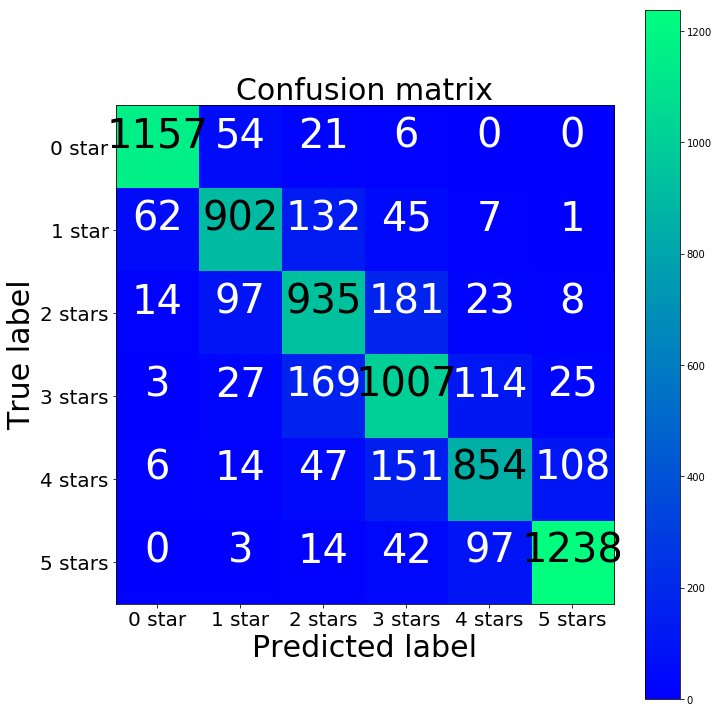

[[1157   54   21    6    0    0]
 [  62  902  132   45    7    1]
 [  14   97  935  181   23    8]
 [   3   27  169 1007  114   25]
 [   6   14   47  151  854  108]
 [   0    3   14   42   97 1238]]
========== TEST ==========
model = Random Forest, accuracy = 0.806, precision = 0.807, recall = 0.806, f1 = 0.806 



(array([3, 1, 5, ..., 2, 4, 1]),
 array([0, 4, 4, ..., 5, 5, 3]),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=20, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=32, n_jobs=1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False))

46

In [18]:
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense, Activation, Input, Dropout

y_train_nn = keras.utils.to_categorical(y_train, num_classes=6)
y_test_nn = keras.utils.to_categorical(y_test, num_classes=6)

In [19]:
nn_model = Sequential([   
    Dense(64, input_shape=(len(X_train.columns), )),
    Activation('relu'),
    
    Dropout(0.5),

    Dense(64),
    Activation('relu'),

    Dense(6),
    Activation('softmax'),
])

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

nn_model.compile(
    optimizer=sgd,
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

In [20]:
history = nn_model.fit(
    X_train, 
    y_train_nn,
    epochs=150,
    batch_size=64,
    validation_data=(
        X_test,
        y_test_nn,
    )
)

Train on 30254 samples, validate on 7564 samples
Epoch 1/150
30254/30254 [==============================] - 1s 44us/step - loss: 0.4459 - acc: 0.8333 - val_loss: 0.4319 - val_acc: 0.8333
Epoch 2/150
30254/30254 [==============================] - 1s 39us/step - loss: 0.4280 - acc: 0.8336 - val_loss: 0.4120 - val_acc: 0.8340
Epoch 3/150
30254/30254 [==============================] - 1s 45us/step - loss: 0.4119 - acc: 0.8366 - val_loss: 0.3931 - val_acc: 0.8399
Epoch 4/150
30254/30254 [==============================] - 1s 41us/step - loss: 0.3977 - acc: 0.8403 - val_loss: 0.3755 - val_acc: 0.8438
Epoch 5/150
30254/30254 [==============================] - 1s 34us/step - loss: 0.3822 - acc: 0.8445 - val_loss: 0.3570 - val_acc: 0.8496
Epoch 6/150
30254/30254 [==============================] - 1s 34us/step - loss: 0.3668 - acc: 0.8483 - val_loss: 0.3375 - val_acc: 0.8542
Epoch 7/150
30254/30254 [==============================] - 1s 35us/step - loss: 0.3499 - acc: 0.8526 - val_loss: 0.3199 - v

Epoch 118/150
30254/30254 [==============================] - 1s 35us/step - loss: 0.2356 - acc: 0.8889 - val_loss: 0.2201 - val_acc: 0.8995
Epoch 119/150
30254/30254 [==============================] - 1s 34us/step - loss: 0.2350 - acc: 0.8890 - val_loss: 0.2210 - val_acc: 0.8991
Epoch 120/150
30254/30254 [==============================] - 1s 36us/step - loss: 0.2345 - acc: 0.8893 - val_loss: 0.2253 - val_acc: 0.8952
Epoch 121/150
30254/30254 [==============================] - 1s 33us/step - loss: 0.2358 - acc: 0.8892 - val_loss: 0.2221 - val_acc: 0.8977
Epoch 122/150
30254/30254 [==============================] - 1s 34us/step - loss: 0.2340 - acc: 0.8898 - val_loss: 0.2202 - val_acc: 0.9005
Epoch 123/150
30254/30254 [==============================] - 1s 41us/step - loss: 0.2337 - acc: 0.8905 - val_loss: 0.2207 - val_acc: 0.8993
Epoch 124/150
30254/30254 [==============================] - 1s 41us/step - loss: 0.2336 - acc: 0.8905 - val_loss: 0.2271 - val_acc: 0.8917
Epoch 125/150
30254/

Text(0.5,1,'Accuracy over train epochs')

Text(0,0.5,'Accuracy')

Text(0.5,0,'Epoch')

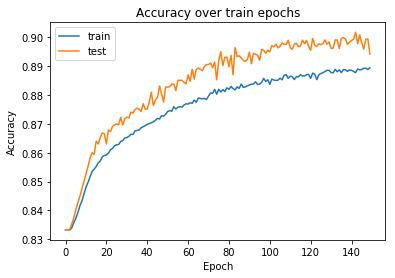

In [17]:

# plot accuracy over training epochs
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.title('Accuracy over train epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()